<a href="https://colab.research.google.com/github/mahfuz978/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/%20Day_4_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# ASSIGNMENT

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-08-08 20:54:43--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                <=> ]  21.56M   909KB/s    in 25s     

2019-08-08 20:55:08 (894 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22606280]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [3]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [4]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4404.61","4404.61","1701.34","1701.34","1195.39","505.95","0.0","0.0","0.0","Jul-2019","190.21","Aug-2019","Jul-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

In [18]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_rows', 500)

df = pd.read_csv('LoanStats_2018Q4.csv', header = 1 , skipfooter = 2, engine = 'python')
print(df.shape)
df.head()

(128412, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8540.01,8540.01,1936.77,1936.77,...,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3510.60,3510.60,926.28,926.28,...,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (16-30 days),n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,...,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,23000,23000,23000.0,60 months,20.89%,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,Feb-1997,0,NaN,NaN,5,0,976,13%,10,w,21597.84,21597.84,3686.64,3686.64,...,0.0,0,0,7500,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8000,8000,8000.0,36 months,23.40%,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,7021.26,7021.26,1852.50,1852.50,...,100.0,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,7902.84,7902.84,3112.50,3112.50,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,3932.69,3932.69,1524.70,1524.70,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,7800.53,7605.52,2933.76,2860.42,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,7950.71,7950.71,3195.33,3195.33,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.isnull().sum().sort_values(ascending = False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_dpd                                  128409
deferral_term                                 128409
hardship_amount                               128409
hardship_start_date                           128409
hardship_end_date                             128409
payment_plan_start_date                       128409
hardship_length                               128409
orig_projected_additional_accrued_interest    128409
hardship_loan_status                          128409
hardship_reason                               128409
hardship_payoff_balance_amount                128409
hardship_last_payment_amount                  128409
hardship_type                                 128409
hardship_status                               128409
settlement_percentage                         

In [0]:
df = df.drop(columns =['id', 'member_id', 'desc', 'url'], axis= 'columns')

In [22]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [24]:
type(df['int_rate'])

pandas.core.series.Series

In [25]:
int_rate = '15.02%'
int_rate[:-1]

'15.02'

In [27]:
int_list =[ '15.02%', '13.56%', '16.91%' ]
int_list[:2]

['15.02%', '13.56%']

In [28]:
int_rate.strip('%')

'15.02'

In [29]:
type(int_rate.strip('%'))

str

In [32]:
float(int_rate.strip('%'))

15.02

In [34]:
type(float(int_rate.strip('%')))

float

In [0]:
def remove_percent_to_float(string):
  return float(string.strip('%'))

In [46]:
int_list = ['15.02%','13.56%', '16.91%']
[remove_percent_to_float(item) for item in int_list]

[15.02, 13.56, 16.91]

In [0]:
df['int_rate']= df['int_rate'].apply(remove_percent_to_float)

In [48]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8540.01,8540.01,1936.77,1936.77,1459.99,476.78,0.0,0.0,...,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3510.60,3510.60,926.28,926.28,489.40,436.88,0.0,0.0,...,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (16-30 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,...,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,23000,23000,23000.0,60 months,20.89,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,Feb-1997,0,NaN,NaN,5,0,976,13%,10,w,21597.84,21597.84,3686.64,3686.64,1402.16,2284.48,0.0,0.0,...,0.0,0,0,7500,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,7021.26,7021.26,1852.50,1852.50,978.74,873.76,0.0,0.0,...,100.0,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [52]:
df['emp_title']

0                                              NaN
1                                         Security
2                                   Administrative
3                                         Operator
4                                          Manager
5                               Nursing Supervisor
6                                              NaN
7                                             Chef
8                                      Postmaster 
9                                              NaN
10                                Material Handler
11                       Instructional Coordinator
12                Financial Relationship Associate
13                                             NaN
14                             Sale Representative
15                             driver coordinator 
16                                   gas attendant
17                                     Casino Host
18                                       Carpenter
19                            M

In [55]:
df['emp_title'].value_counts(dropna = False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [56]:
df['emp_title'].isnull().sum()

20947

In [67]:
import numpy as np
examples = ['owner', 'Supervisor', 'Project Manager', np.NaN] 
def clean_title(item):
  if isinstance(item, str):
    return item.strip().title()
  else:
    return "Unknown"
[clean_title(item) for item in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [71]:
df['emp_title'] = df['emp_title'].apply(clean_title)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8540.01,8540.01,1936.77,1936.77,1459.99,476.78,0.0,0.0,...,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3510.60,3510.60,926.28,926.28,489.40,436.88,0.0,0.0,...,0.0,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (16-30 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,...,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,23000,23000,23000.0,60 months,20.89,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,Feb-1997,0,NaN,NaN,5,0,976,13%,10,w,21597.84,21597.84,3686.64,3686.64,1402.16,2284.48,0.0,0.0,...,0.0,0,0,7500,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,7021.26,7021.26,1852.50,1852.50,978.74,873.76,0.0,0.0,...,100.0,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df['emp_title'].value_counts(dropna = False).reset_index().shape

(34902, 2)

In [80]:
df.describe(exclude = 'number')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,128412,128412,128412,128412,116708,128412,128412,128412,128412,128412,128412,128412,128412,128412,128412,128256,128412,128253,115848,128411,128412,14848,16782,128412,3,3,3,3,3,3,3,128412,62,62,62
unique,2,7,35,34902,11,4,3,3,7,1,12,12,880,50,644,1074,2,10,4,11,2,3,573,2,1,2,2,2,2,2,3,2,5,3,6
top,36 months,A,A4,Unknown,10+ years,MORTGAGE,Not Verified,Oct-2018,Current,n,debt_consolidation,Debt consolidation,112xx,CA,Aug-2006,0%,w,Jul-2019,Aug-2019,Jul-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,UNEMPLOYMENT,ACTIVE,Jul-2019,Oct-2019,Aug-2019,In Grace Period,N,Jul-2019,ACTIVE,May-2019
freq,88179,38011,9770,20947,38826,63490,58350,46305,112313,128412,70603,70603,1370,17879,1130,1132,114498,99427,89985,119250,111630,6360,155,128410,3,2,2,2,2,2,1,128350,27,56,20


In [82]:
df['emp_title'].describe(exclude = 'number')

count      128412
unique      34902
top       Unknown
freq        20947
Name: emp_title, dtype: object

In [83]:
df['emp_title'].nunique()

34902

In [84]:
df.emp_title_manager = True
print(df.emp_title_manager)

True


In [85]:
df['emp_title_manager'] = True
print(df['emp_title_manager'])

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
30        True
31        True
32        True
33        True
34        True
35        True
36        True
37        True
38        True
39        True
40        True
41        True
42        True
43        True
44        True
45        True
46        True
47        True
48        True
49        True
50        True
51        True
52        True
53        True
54        True
55        True
56        True
57        True
58        True
59        True
60        True
61        True
62        True
63        True
64        True
65        True
66        

In [86]:
df['emp_title_manager'] = df['emp_title'].str.contains("Manager")

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8540.01,8540.01,1936.77,1936.77,1459.99,476.78,0.0,0.0,...,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3510.60,3510.60,926.28,926.28,489.40,436.88,0.0,0.0,...,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (16-30 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,...,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
3,23000,23000,23000.0,60 months,20.89,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,Feb-1997,0,NaN,NaN,5,0,976,13%,10,w,21597.84,21597.84,3686.64,3686.64,1402.16,2284.48,0.0,0.0,...,0,0,7500,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
4,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,7021.26,7021.26,1852.50,1852.50,978.74,873.76,0.0,0.0,...,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True


In [87]:
condition = (df['emp_title_manager'] == True)
managers = df[condition]
print(managers.shape)
managers.head()

(17882, 141)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
4,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,7021.26,7021.26,1852.50000,1852.50,978.74,873.76,0.0,0.0,...,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
21,35000,35000,35000.0,60 months,15.02,833.02,C,C3,Sr Sales Manager,10+ years,MORTGAGE,290000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,656xx,MO,7.60,0,Dec-2004,0,29.0,NaN,15,0,29416,93.7%,33,w,32554.98,32554.98,4954.31000,4954.31,2445.02,2509.29,0.0,0.0,...,0,0,513173,87439,21600,82773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
30,25000,25000,25000.0,60 months,16.14,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.16758,26653.17,25000.00,1653.17,0.0,0.0,...,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
35,8000,8000,8000.0,36 months,11.80,264.96,B,B4,Program Manager,7 years,MORTGAGE,85000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,366xx,AL,23.61,0,Dec-1991,1,NaN,NaN,11,0,29038,47.2%,29,w,6854.40,6854.40,1581.89000,1581.89,1145.60,436.29,0.0,0.0,...,0,0,151710,103435,45700,90210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
46,16500,16500,16500.0,60 months,17.97,418.73,D,D1,Case Manager,5 years,MORTGAGE,37000.0,Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,775xx,TX,52.09,0,Oct-2001,1,NaN,NaN,9,0,10606,82.9%,18,w,15430.80,15430.80,2528.86000,2528.86,1069.20,1459.66,0.0,0.0,...,0,0,155305,81106,7800,94643,18602.0,Jan-2005,1.0,1.0,8.0,86.6,2.0,8.0,0.0,0.0,46.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True


In [88]:
managers = df[df['emp_title'].str.contains('Manager')]
print(managers.shape)
managers.head()

(17882, 141)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
4,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,7021.26,7021.26,1852.50000,1852.50,978.74,873.76,0.0,0.0,...,1,0,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
21,35000,35000,35000.0,60 months,15.02,833.02,C,C3,Sr Sales Manager,10+ years,MORTGAGE,290000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,656xx,MO,7.60,0,Dec-2004,0,29.0,NaN,15,0,29416,93.7%,33,w,32554.98,32554.98,4954.31000,4954.31,2445.02,2509.29,0.0,0.0,...,0,0,513173,87439,21600,82773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
30,25000,25000,25000.0,60 months,16.14,609.82,C,C4,Production Manager,5 years,MORTGAGE,45000.0,Not Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,703xx,LA,37.09,0,Sep-2003,0,NaN,NaN,7,0,8901,36.8%,21,w,0.00,0.00,26653.16758,26653.17,25000.00,1653.17,0.0,0.0,...,0,0,73683,49524,18600,49483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
35,8000,8000,8000.0,36 months,11.80,264.96,B,B4,Program Manager,7 years,MORTGAGE,85000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,366xx,AL,23.61,0,Dec-1991,1,NaN,NaN,11,0,29038,47.2%,29,w,6854.40,6854.40,1581.89000,1581.89,1145.60,436.29,0.0,0.0,...,0,0,151710,103435,45700,90210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True
46,16500,16500,16500.0,60 months,17.97,418.73,D,D1,Case Manager,5 years,MORTGAGE,37000.0,Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,775xx,TX,52.09,0,Oct-2001,1,NaN,NaN,9,0,10606,82.9%,18,w,15430.80,15430.80,2528.86000,2528.86,1069.20,1459.66,0.0,0.0,...,0,0,155305,81106,7800,94643,18602.0,Jan-2005,1.0,1.0,8.0,86.6,2.0,8.0,0.0,0.0,46.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True


In [89]:
plebians = df[df['emp_title_manager'] == False]
print(plebians.shape)
plebians.head()

(110530, 141)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8540.01,8540.01,1936.77,1936.77,1459.99,476.78,0.0,0.0,...,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3510.60,3510.60,926.28,926.28,489.40,436.88,0.0,0.0,...,0,0,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Late (16-30 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,...,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
3,23000,23000,23000.0,60 months,20.89,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,Feb-1997,0,NaN,NaN,5,0,976,13%,10,w,21597.84,21597.84,3686.64,3686.64,1402.16,2284.48,0.0,0.0,...,0,0,7500,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False
5,32075,32075,32075.0,60 months,11.80,710.26,B,B4,Nursing Supervisor,10+ years,MORTGAGE,150000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,231xx,VA,22.21,0,Aug-2005,0,NaN,NaN,17,0,19077,32%,24,w,29646.85,29646.85,4230.02,4230.02,2428.15,1801.87,0.0,0.0,...,0,0,360433,56635,20000,80125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False


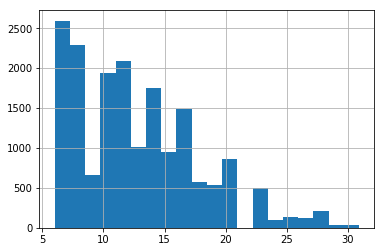

In [90]:
managers['int_rate'].hist(bins=20);

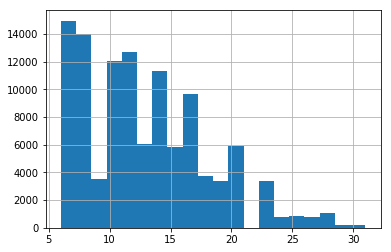

In [91]:
plebians['int_rate'].hist(bins=20);

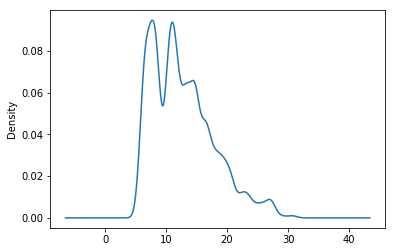

In [92]:
managers['int_rate'].plot.density();

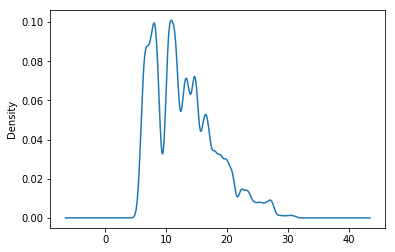

In [94]:
plebians['int_rate'].plot.density();

In [95]:
managers['int_rate'].mean()

12.760582149647123

In [96]:
plebians['int_rate'].mean()

12.957292318828944

In [97]:
df['issue_d']

0         Dec-2018
1         Dec-2018
2         Dec-2018
3         Dec-2018
4         Dec-2018
5         Dec-2018
6         Dec-2018
7         Dec-2018
8         Dec-2018
9         Dec-2018
10        Dec-2018
11        Dec-2018
12        Dec-2018
13        Dec-2018
14        Dec-2018
15        Dec-2018
16        Dec-2018
17        Dec-2018
18        Dec-2018
19        Dec-2018
20        Dec-2018
21        Dec-2018
22        Dec-2018
23        Dec-2018
24        Dec-2018
25        Dec-2018
26        Dec-2018
27        Dec-2018
28        Dec-2018
29        Dec-2018
30        Dec-2018
31        Dec-2018
32        Dec-2018
33        Dec-2018
34        Dec-2018
35        Dec-2018
36        Dec-2018
37        Dec-2018
38        Dec-2018
39        Dec-2018
40        Dec-2018
41        Dec-2018
42        Dec-2018
43        Dec-2018
44        Dec-2018
45        Dec-2018
46        Dec-2018
47        Dec-2018
48        Dec-2018
49        Dec-2018
50        Dec-2018
51        Dec-2018
52        De

In [98]:
df['issue_d'].describe()

count       128412
unique           3
top       Oct-2018
freq         46305
Name: issue_d, dtype: object

In [99]:
df['issue_d'].value_counts()

Oct-2018    46305
Nov-2018    41973
Dec-2018    40134
Name: issue_d, dtype: int64

In [100]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
title                                          object
zip_code                    

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)

In [102]:
df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [103]:
df.dtypes

loan_amnt                                              int64
funded_amnt                                            int64
funded_amnt_inv                                      float64
term                                                  object
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
purpose                 

In [104]:
df['issue_d'].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
5         2018
6         2018
7         2018
8         2018
9         2018
10        2018
11        2018
12        2018
13        2018
14        2018
15        2018
16        2018
17        2018
18        2018
19        2018
20        2018
21        2018
22        2018
23        2018
24        2018
25        2018
26        2018
27        2018
28        2018
29        2018
30        2018
31        2018
32        2018
33        2018
34        2018
35        2018
36        2018
37        2018
38        2018
39        2018
40        2018
41        2018
42        2018
43        2018
44        2018
45        2018
46        2018
47        2018
48        2018
49        2018
50        2018
51        2018
52        2018
53        2018
54        2018
55        2018
56        2018
57        2018
58        2018
59        2018
60        2018
61        2018
62        2018
63        2018
64        2018
65        2018
66        

In [105]:
df['issue_d'].dt.month

0         12
1         12
2         12
3         12
4         12
5         12
6         12
7         12
8         12
9         12
10        12
11        12
12        12
13        12
14        12
15        12
16        12
17        12
18        12
19        12
20        12
21        12
22        12
23        12
24        12
25        12
26        12
27        12
28        12
29        12
30        12
31        12
32        12
33        12
34        12
35        12
36        12
37        12
38        12
39        12
40        12
41        12
42        12
43        12
44        12
45        12
46        12
47        12
48        12
49        12
50        12
51        12
52        12
53        12
54        12
55        12
56        12
57        12
58        12
59        12
60        12
61        12
62        12
63        12
64        12
65        12
66        12
67        12
68        12
69        12
70        12
71        12
72        12
73        12
74        12
75        12
76        12

In [0]:
df['issue_year'] = df['issue_d'].dt.year

In [0]:
df['issue_month'] = df['issue_d'].dt.month

In [108]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,issue_month
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,Unknown,< 1 year,MORTGAGE,280000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,8540.01,8540.01,1936.77,1936.77,1459.99,476.78,0.0,0.0,...,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
1,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3510.60,3510.60,926.28,926.28,489.40,436.88,0.0,0.0,...,98655,66926,21900,71555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Late (16-30 days),n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,4456.17,4456.17,895.96,895.96,543.83,352.13,0.0,0.0,...,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
3,23000,23000,23000.0,60 months,20.89,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,Feb-1997,0,NaN,NaN,5,0,976,13%,10,w,21597.84,21597.84,3686.64,3686.64,1402.16,2284.48,0.0,0.0,...,7500,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12
4,8000,8000,8000.0,36 months,23.40,311.35,E,E1,Manager,10+ years,OWN,43000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,357xx,AL,33.24,0,Jan-1995,0,NaN,107.0,8,1,9019,81.3%,16,w,7021.26,7021.26,1852.50,1852.50,978.74,873.76,0.0,0.0,...,199744,31078,2300,32206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,True,2018,12


In [109]:
[col for col in df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [110]:
df['earliest_cr_line'].head()

0    Jan-1996
1    Sep-2006
2    Apr-2011
3    Feb-1997
4    Jan-1995
Name: earliest_cr_line, dtype: object

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], 
                                        infer_datetime_format=True)

In [0]:
df['days_from_earliest_credit_to_issue'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [113]:
df['days_from_earliest_credit_to_issue'].describe()

count    128412.000000
mean       5859.891490
std        2886.535578
min        1126.000000
25%        4049.000000
50%        5266.000000
75%        7244.000000
max       25171.000000
Name: days_from_earliest_credit_to_issue, dtype: float64

In [114]:
25171/365

68.96164383561644

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01